# Earth Surface Temperature Data Analysis


## Global Warming Data Analysis 

### By Vaughan Reale, Ryan Kenney, and Judah Nouriyelian

Welcome to our final project! Today, we are going to apply many of the various things we have learned in the class CIS 545 to our own analysis of Climate Change. This project allows us to utilize data in a more socially conscious way, using data science to see if we can spot out trends and create a robust model surrounding long/short term climate change in the world

We intend to primarily study the Kaggle data set, "Climate Change: Earth Surface Temperature Data." This dataset contains data on surface temperatures based on geographic locations. We plan to perform analysis to better understand and visualize how temperatures have changed throughout history, the factors that correlate most to this issue, as well as to make predictions about future temperature changes. In the process of doing so, we utilize other datasets, primarily in the production of various meat products, energy consumption, as well as population data, in order to create this better model

We are going to first set up our workspace with the various datasets in question

# Part 1: Downloading Datasets Package Imports 

## 1.1 Kaggle Dataset Initialization

We begin by first setting up our various kaggle datasets into our notebook for use later

In [ ]:
# Start writing code here...
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data
!kaggle datasets download -d pralabhpoudel/world-energy-consumption
!kaggle datasets download -d pragadesh06/meat-production-datasets1961-2018
!kaggle datasets download -d prasertk/population-pyramid-by-country-from-19502022

mkdir: cannot create directory ‘/root/.kaggle’: File exists
climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)
world-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)
meat-production-datasets1961-2018.zip: Skipping, found more recently modified local copy (use --force to force download)
population-pyramid-by-country-from-19502022.zip: Skipping, found more recently modified local copy (use --force to force download)


Link to the UN population dataset:
https://data.un.org/Data.aspx?d=POP&f=tableCode%3A240

## 1.2 Imports

We run these commands in order to import many of the necessary libraries that we will use in our project for both handling the data as well as visualizing it

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Dataset Extraction

We begin by unzipping the various datasets to add the various CSVs into the project (uncomment the code if the CSVs are not already in your notebook)

In [ ]:
# !unzip population-pyramid-by-country-from-19502022.zip

In [ ]:
#!unzip world-energy-consumption.zip

In [ ]:
#!unzip climate-change-earth-surface-temperature-data.zip

In [ ]:
#!unzip meat-production-datasets1961-2018.zip

### Read Pandas Data Frames from CSV Files

We then read our CSVs into Pandas Dataframes for use in our later data wrangling and analysis

In [ ]:
temps_city_df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [ ]:
temps_country_df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [ ]:
temps_major_city_df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [ ]:
temps_state_df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [ ]:
city_population_df = pd.read_csv('UNdata_Export_20220419_214903505.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
world_energy_consumption_df = pd.read_csv('World Energy Consumption.csv')

In [ ]:
meat_production_df = pd.read_csv("animals-slaughtered-for-meat.csv")

In [ ]:
pop_by_country_df = pd.read_csv('population_pyramid_1950-2022.csv')

# Part II: Dataset Cleaning/Preprocessing

## 2.1 Dropping Nulls

We first look to see whether we have null values for any of our columns

In [ ]:
temps_major_city_df.info()
temps_major_city_df['City'].unique()
# temps_major_city_df['Country'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

We then drop the nulls

In [ ]:
temps_major_city_df = temps_major_city_df.dropna()
temps_major_city_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             228175 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           228175 non-null  object 
 4   Country                        228175 non-null  object 
 5   Latitude                       228175 non-null  object 
 6   Longitude                      228175 non-null  object 
dtypes: float64(2), object(5)
memory usage: 13.9+ MB


The data in 'population_pyramid_1950-2022.csv' has populations for different years for male and female genders, broken up into age ranges. We want the total population for both genders across all ages ranges. Accordingly, we sum to get the total population.

In [ ]:
#sum up populations across all age groups for both sexes
pop_by_country_df = pop_by_country_df.groupby(by = ['Country', 'Year'])['M','F'].sum().reset_index()

#sum population of each sex
pop_by_country_df['Population'] = pop_by_country_df['M'] + pop_by_country_df['F']

#only take population, country, and year columns
pop_by_country_df = pop_by_country_df[['Country', 'Year', 'Population']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


# Part III: EDA

## 3.1 World Temperature Dataset

Now we begin to see how we can properly fix the world temperature dataset in order to later merge it. 

First, we look at the actual data we are working with

In [ ]:
temps_city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


We note that as we want our values to be strictly numeric, we need to process the longitude and latitude. We do this by defining a function to drop the directional component as we assume that the effects of being a certain distance from the equator are equivalent in both the north and south directions. We also drop the longitude direction as we consider the prime meridian as a useful benchmark for the center of western countries

In [ ]:
def process_direction(val):
    if val[-1] == "N" or val[-1] == "W":
        return float(val[:-1])
    elif val[-1] == "S" or val[-1] == "E":
        return -float(val[:-1])
    else:
        return np.NaN
cleaned_temps_city_df = temps_city_df    
cleaned_temps_city_df["Latitude"] = cleaned_temps_city_df["Latitude"].apply(process_direction)
cleaned_temps_city_df["Longitude"] = cleaned_temps_city_df["Longitude"].apply(process_direction)

We then extract the year from the temps_city_df datatime column as we are going to merge with the other datasets based on year.

In [ ]:
cleaned_temps_city_df["dt"] = pd.to_datetime(cleaned_temps_city_df["dt"], format="%Y-%m-%d")
cleaned_temps_city_df["Year"] = cleaned_temps_city_df["dt"].dt.year

While the full range of years could be used in our analysis, there are a few points that need to be addressed:
*   Global warming is a relatively modern issue
*   Weather data was not consistently or reliably until recently
*   A large dataframe is hard to work with in memory
*   Our other datasets don't date back as far

Considering this, it is reasonable to confine the temperature dataset to a certain year range. After testing a variety of dates, 1950 was found to be a good compromise for the aforementioned issues, such that only years past 1949 will be included in the final dataset.





In [ ]:
cleaned_temps_city_df = cleaned_temps_city_df[cleaned_temps_city_df["Year"] >= 1950]

Finally, since temperature will determine the target for our future models, no data should be kept that excludes a temperature, as this will ultimately be useless data.

In [ ]:
# Drop all rows missing temperature values
final_temps_city_df = cleaned_temps_city_df[cleaned_temps_city_df["AverageTemperature"].notna()]

With the primary dataset complete, it may be interesting to look at the temperature trends of the world to see the impacts of global warming.

[Text(0.5, 1.0, 'Average Global Temperature By Year')]

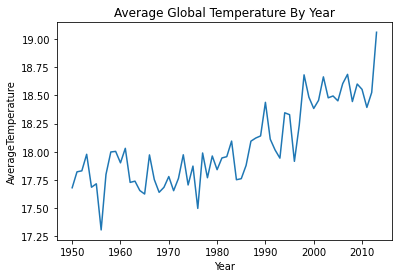

In [ ]:
avg_temp_df = final_temps_city_df[["Year", "AverageTemperature"]].groupby("Year").mean().reset_index()
ax = sns.lineplot(x=avg_temp_df["Year"], y=avg_temp_df["AverageTemperature"])
ax.set(title='Average Global Temperature By Year')

While the global temperature shows a good indication of general trend, looking at Philadelphia specifically might be more interesting for us.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'Average Philadelphia Temperature By Year')]

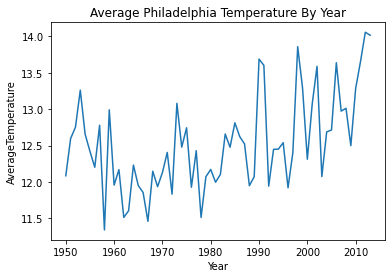

In [ ]:
avg_temp_df = final_temps_city_df[cleaned_temps_city_df["City"] == "Philadelphia"][["Year", "AverageTemperature"]].groupby("Year").mean().reset_index()
ax = sns.lineplot(x=avg_temp_df["Year"], y=avg_temp_df["AverageTemperature"])
ax.set(title='Average Philadelphia Temperature By Year')

While there appears to be an upward trend, the variation of temperature throughout the year causes skews in the data. As such, it would be more informative to look at only one month worth of data.

In [ ]:
avg_temp_df = final_temps_city_df[["dt", "Year", "City", "AverageTemperature"]]
avg_temp_df["Month"] = avg_temp_df["dt"].dt.month
avg_temp_df.info()
avg_temp_df = avg_temp_df[(avg_temp_df["City"] == "Philadelphia") | (avg_temp_df["Month"] == 6)][["Year", "AverageTemperature"]].groupby("Year").mean().reset_index()
ax = sns.lineplot(x=avg_temp_df["Year"], y=avg_temp_df["AverageTemperature"])
ax.set(title='Average Philadelphia Temperature By Year')

## 3.2 World Energy Dataset

https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption

The world energy dataset provides a staggering number of features related to the energy production and consumption of every country. Since fossil fuel usage is regarded as the primary culprit of climate change, this information should synergize with the baseline temperatures dataframe.

As a first step, a basic analysis of the contents of the data is performed by looking at what features are present, as well as the overall quality of the data

In [ ]:
world_energy_consumption_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 122 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    iso_code                                 15630 non-null  object 
 1    country                                  17432 non-null  object 
 2    year                                     17432 non-null  int64  
 3    coal_prod_change_pct                     7445 non-null   float64
 4    coal_prod_change_twh                     10394 non-null  float64
 5    gas_prod_change_pct                      4862 non-null   float64
 6    gas_prod_change_twh                      7893 non-null   float64
 7    oil_prod_change_pct                      6521 non-null   float64
 8    oil_prod_change_twh                      8565 non-null   float64
 9    energy_cons_change_pct                   9842 non-null   float64
 10   energy_cons_change_twh          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


The first note is that the data begins at 1900 for each country. As such, it can be seen that more modern forms of energy, such as wind and nuclear, have a significantly higher count of missing values than staple fossil fuel sources. However, this entails that the missing values are not the result of incomplete data, but rather a lack of production at that point in time. While this may not be true for every entry, it should be reasonable to fill NaN values with 0 to indicate no production or consumption at that point in time.

Another discrepancy that immediately stands out is the difference in missing value between the ISO code and country name columns. Upon investigation, the cuplrit is found to be that not all "country" entries are actually current countires. Some entries are continents, geographical regions, or countires that no longer exist (ie. USSR). In these cases, no ISO code can be given to these areas, resulting in the discrepency of null values. Since the temperature dataset only considers existing countries, removing rows without ISO codes will rectify the problem. Finally, the main dataset does not include ISO codes, making the column pointless for merging.

In [ ]:
# Drop rows with no iso codes (not a country), check for any remaining nulls, and drop iso_code
cleaned_world_energy_consumption_df = world_energy_consumption_df.dropna(subset=["iso_code"])
cleaned_world_energy_consumption_df = cleaned_world_energy_consumption_df.dropna(subset=["year"])
cleaned_world_energy_consumption_df = cleaned_world_energy_consumption_df.drop("iso_code", axis=1)

cleaned_world_energy_consumption_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15630 entries, 0 to 17431
Data columns (total 121 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    country                                  15630 non-null  object 
 1    year                                     15630 non-null  int64  
 2    coal_prod_change_pct                     6441 non-null   float64
 3    coal_prod_change_twh                     9352 non-null   float64
 4    gas_prod_change_pct                      4076 non-null   float64
 5    gas_prod_change_twh                      6983 non-null   float64
 6    oil_prod_change_pct                      5571 non-null   float64
 7    oil_prod_change_twh                      7576 non-null   float64
 8    energy_cons_change_pct                   8650 non-null   float64
 9    energy_cons_change_twh                   8700 non-null   float64
 10   biofuel_share_elec              

Before imputing missing values, it is worth generating a correlation matrix since the sheer number of columns makes it difficult to manually discern relations. The NaN values will provide a greater contrast for this purpose, making smaller relations more vivid.

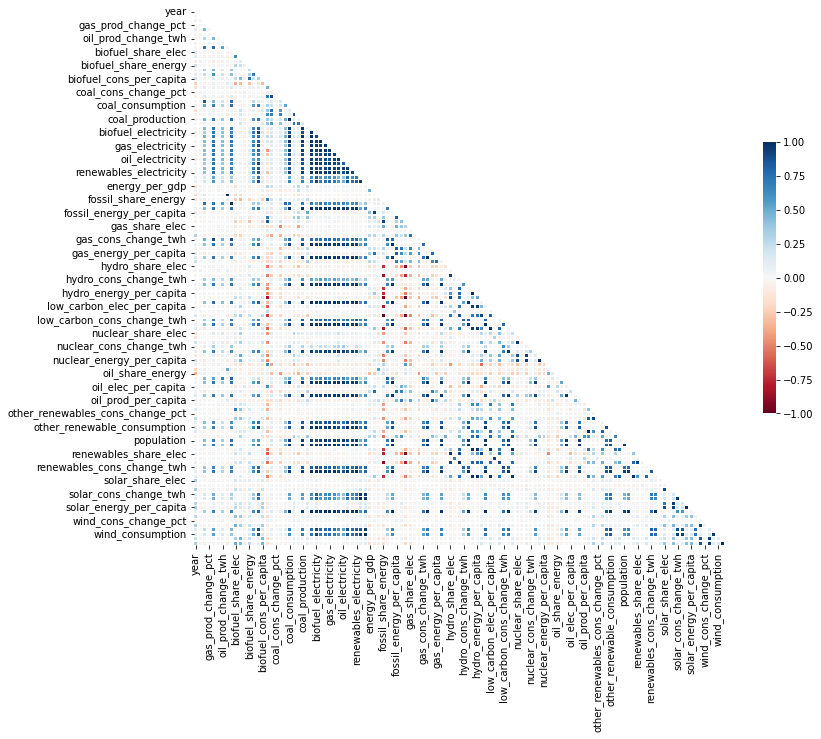

In [ ]:
# extract numeric data types from energy df
numerics_df = cleaned_world_energy_consumption_df.select_dtypes(include = ['int64', 'float64'])

# compute correlation matrix for numeric features
corr_matrix = numerics_df.corr()

# Plot correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
pal = plt.get_cmap(name = 'RdBu')
sns.heatmap(corr_matrix, mask=mask, cmap=pal, vmax=1, vmin = -1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

While there are, expectedly, a large number of uncorrelated features, there are quite a few that are very strongly related. This is to be expected, as there are a number of redundant features (e.g. percent change vs. terawatt hour change). To highlight this point, let's zoom in on the are of highest correlation in the data.

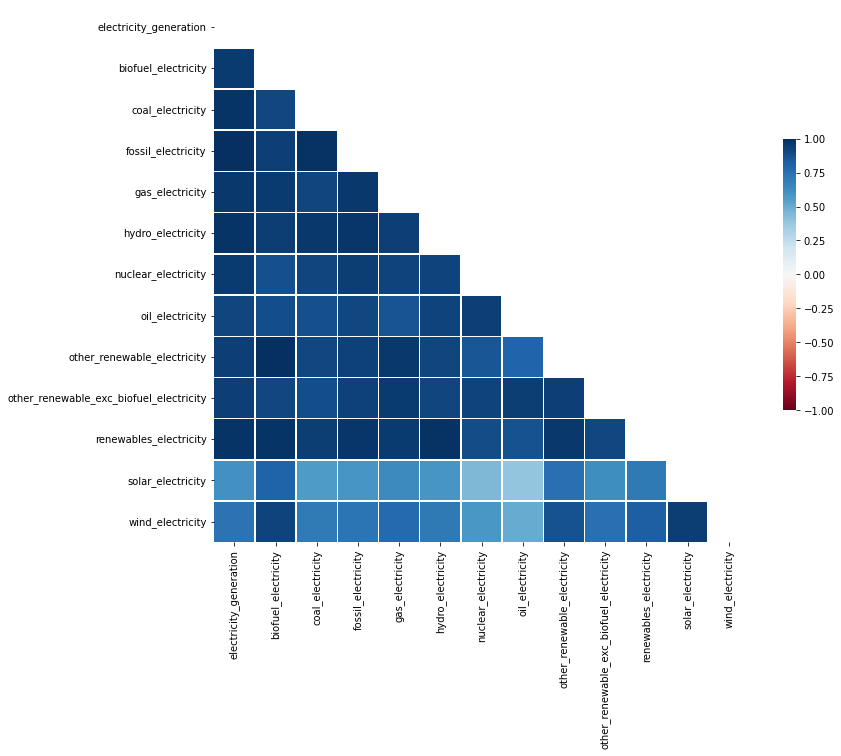

In [ ]:
# extract numeric data types from energy df
numerics_df = cleaned_world_energy_consumption_df.loc[:,"electricity_generation":"wind_electricity"]

# compute correlation matrix for numeric features
corr_matrix = numerics_df.corr()

# Plot correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12, 10))
pal = plt.get_cmap(name = 'RdBu')
sns.heatmap(corr_matrix, mask=mask, cmap=pal, vmax=1, vmin = -1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

While these features are conceptually independant from one another, in practice they all increase as our power consumption climbs, resulting in a number of variables that all effectively indicate the same idea. As such, it would be beneficial to reduce this redundancy before combining this dataset with our primary.

With this out of the way, the NaN values may be replaced in order to make the dataset usable with PCA, which will provide an algorithmic way to reduce the problem of redundancy.

In [ ]:
# Fill empty values with 0 as there was no production / consumption during these years
cleaned_world_energy_consumption_df = cleaned_world_energy_consumption_df.replace([np.inf, -np.inf], np.nan)
cleaned_world_energy_consumption_df = cleaned_world_energy_consumption_df.fillna(0)

We first need to scale our data as PCA is not scale invariant and thus requires us to scale the data accordingly. Once we transform our dataset using StandardScaler, we can then instantiate our PCA model and fit it to the data to see how many components are truly useful and which are more redundant.

In [ ]:
# Since many features exist in this dataset and many are directly correlated, 
# use PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

# Take out the country and year column and save them
world_energy_country_column = cleaned_world_energy_consumption_df["country"]
world_energy_year_column = cleaned_world_energy_consumption_df["year"]
cleaned_world_energy_consumption_df = cleaned_world_energy_consumption_df.drop(["country", "year"], axis=1)
# Scale and fit PCA
scaled_world_energy_consumption_df = scaler.fit_transform(cleaned_world_energy_consumption_df)
pca = PCA()
pca = pca.fit(scaled_world_energy_consumption_df)

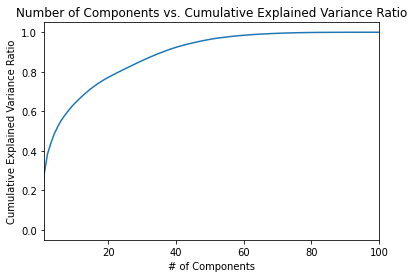

In [ ]:
# Check / graph variance
cum_evr = pca.explained_variance_ratio_.cumsum()
cum_evr_mod = np.insert(cum_evr, 0, 0)
plt.plot(cum_evr_mod)
plt.xlabel("# of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.xlim(1, 100)
plt.title("Number of Components vs. Cumulative Explained Variance Ratio")
plt.show()

At approximately 60 components, it can be seen that we have achieved the same level of explained variance as the original dataset while effectively halving the number of variables. This then presents the question of variance cutoff, as an even smaller number of components can be used without significantly impacting the explained variance. However, 60 provides an easy tradeoff of less features with little downside, making this a fine cutoff for now.

In [ ]:
# 60 seems to be about where the variance levels out, so use this as the number of components
n = 60
pca = PCA(n_components=n)
final_world_energy_consumption_df = pd.DataFrame(pca.fit_transform(scaled_world_energy_consumption_df))
# Return the country and year column
final_world_energy_consumption_df["Year"] = world_energy_year_column
final_world_energy_consumption_df["Country"] = world_energy_country_column

Finally, we check that our data is in the correct form and fix the final errors created from adding back columns.

In [ ]:
final_world_energy_consumption_df = final_world_energy_consumption_df.dropna(subset=["Year"])
final_world_energy_consumption_df["Year"] = final_world_energy_consumption_df["Year"].astype("int64")
final_world_energy_consumption_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14069 entries, 0 to 15629
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        14069 non-null  float64
 1   1        14069 non-null  float64
 2   2        14069 non-null  float64
 3   3        14069 non-null  float64
 4   4        14069 non-null  float64
 5   5        14069 non-null  float64
 6   6        14069 non-null  float64
 7   7        14069 non-null  float64
 8   8        14069 non-null  float64
 9   9        14069 non-null  float64
 10  10       14069 non-null  float64
 11  11       14069 non-null  float64
 12  12       14069 non-null  float64
 13  13       14069 non-null  float64
 14  14       14069 non-null  float64
 15  15       14069 non-null  float64
 16  16       14069 non-null  float64
 17  17       14069 non-null  float64
 18  18       14069 non-null  float64
 19  19       14069 non-null  float64
 20  20       14069 non-null  float64
 21  21       140

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,Year,Country
0,-0.815024,-1.595367,0.774360,0.538089,-0.082627,-0.134649,0.074753,0.163089,-0.720303,0.141189,...,0.020861,-0.005096,-0.028571,-0.009302,-0.026317,0.008142,-0.006018,-0.010350,1900,Afghanistan
1,-0.815012,-1.595370,0.774362,0.538083,-0.082635,-0.134645,0.074753,0.163088,-0.720304,0.141193,...,0.020838,-0.005108,-0.028562,-0.009301,-0.026302,0.008135,-0.006028,-0.010331,1901,Afghanistan
2,-0.815000,-1.595373,0.774365,0.538077,-0.082643,-0.134642,0.074753,0.163088,-0.720305,0.141196,...,0.020815,-0.005119,-0.028554,-0.009300,-0.026287,0.008127,-0.006038,-0.010313,1902,Afghanistan
3,-0.814987,-1.595376,0.774368,0.538072,-0.082651,-0.134639,0.074754,0.163087,-0.720307,0.141199,...,0.020792,-0.005131,-0.028546,-0.009300,-0.026271,0.008120,-0.006048,-0.010295,1903,Afghanistan
4,-0.814974,-1.595379,0.774370,0.538066,-0.082659,-0.134635,0.074754,0.163087,-0.720308,0.141203,...,0.020769,-0.005143,-0.028538,-0.009299,-0.026256,0.008113,-0.006058,-0.010276,1904,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15625,-0.479588,0.139862,0.397963,0.587732,-0.604184,0.013740,-0.695943,-0.749091,3.127859,0.388754,...,-0.398843,-0.005526,-0.322738,0.568375,0.248056,0.059482,0.539594,-0.101796,1967,Tunisia
15626,-0.484077,0.024376,0.159428,0.678995,-0.682091,0.063819,-0.811306,-0.368786,2.891519,0.485194,...,-0.540705,-0.005179,-0.380358,0.686441,0.314792,0.056284,0.699678,-0.172312,1968,Tunisia
15627,-0.505743,0.015156,0.540323,0.967748,-0.804682,0.199135,-0.830889,-0.990170,3.022510,0.327211,...,-0.386487,-0.095853,-0.304015,0.720802,0.236492,-0.052079,0.617121,-0.111064,1969,Tunisia
15628,-0.494147,0.065401,0.562287,0.971458,-0.807899,0.204083,-0.847419,-1.006800,3.056322,0.327622,...,-0.368453,-0.111256,-0.298795,0.691145,0.214128,-0.059564,0.600913,-0.099170,1970,Tunisia


## 3.3 Livestock Production Dataset

One might be confused at first why we are choosing to analyze the Livestock Production dataset when considering climate change. The reality is however, that agricultural products have an immense effect on the production of greenhouse gases with Cattle even being the No. 1 agricultural source of greenhouse gases worldwide. Note that also, as the effect of climate change impacts agriculture, thus, we can use agriculture as a type of metric for temperature changes. If interested, one can read about this below

https://www.ucdavis.edu/food/news/making-cattle-more-sustainable#:~:text=Cattle%20are%20the%20No.,about%20220%20pounds%20of%20methane.

First, we clean the data by dropping the code column and rename the entity column to be country (as we will merge on based on country later). We also note that the dataset has many null values and as such, we fill those null values with the value 0. This is due to the fact that these null values likely correspond to not having any production of that livestock (or such a minimal amount that it is negligible) as we note that turkey has a distinctly lower value than the others which makes sense (as turkey is not as common of an agricultural product). 

In [ ]:
# Use iso code to drop non-countries and then drop it
cleaned_meat_production_df = meat_production_df.dropna(subset=["Code"])
cleaned_meat_production_df = cleaned_meat_production_df.drop("Code", axis=1)
cleaned_meat_production_df = cleaned_meat_production_df.rename(columns={"Entity": "Country"})
final_meat_production_df = cleaned_meat_production_df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13537 entries, 0 to 13536
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         13537 non-null  object 
 1   Code                           11618 non-null  object 
 2   Year                           13537 non-null  int64  
 3   Cattle (cattle slaughtered)    13170 non-null  float64
 4   Goats (goats slaughtered)      11930 non-null  float64
 5   Chicken (chicken slaughtered)  13218 non-null  float64
 6   Turkey (turkeys slaughtered)   5262 non-null   float64
 7   Pigs (pigs slaughtered)        12227 non-null  float64
 8   Sheep (sheeps slaughtered)     12150 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 951.9+ KB


In [ ]:
final_meat_production_df

,Country,Year,Cattle (cattle slaughtered),Goats (goats slaughtered),Chicken (chicken slaughtered),Turkey (turkeys slaughtered),Pigs (pigs slaughtered),Sheep (sheeps slaughtered)
0,Afghanistan,1961,360000.0,940000.0,7000000.0,0.0,0.0,4336000.0
1,Afghanistan,1962,384000.0,875000.0,7500000.0,0.0,0.0,4355000.0
2,Afghanistan,1963,396000.0,810000.0,7700000.0,0.0,0.0,4673000.0
3,Afghanistan,1964,402000.0,750000.0,8000000.0,0.0,0.0,5010000.0
4,Afghanistan,1965,408000.0,875000.0,8500000.0,0.0,0.0,5179000.0
...,...,...,...,...,...,...,...,...
13532,Zimbabwe,2014,432942.0,2040000.0,50000000.0,27000.0,378000.0,28000.0
13533,Zimbabwe,2015,501747.0,1728852.0,53000000.0,27000.0,389422.0,27271.0
13534,Zimbabwe,2016,491611.0,1479437.0,58000000.0,28000.0,380286.0,27432.0
13535,Zimbabwe,2017,474251.0,2101765.0,60000000.0,28000.0,316036.0,30665.0


## 3.4 World City Population Dataset

This dataset gives us access to individual city data by year, but more importantly, we are able to add population data to our larger dataset which could be very fruitful as more populated places would be expected to have more carbon emissions, thus adding a useful covariate to our model

In [ ]:
# Filter out extra data from population data (footnotes at the end)
cleaned_city_population_df = city_population_df[:67309]
cleaned_city_population_df = cleaned_city_population_df.rename(columns={"Country or Area": "Country"})

# Drop some extraneous columns to reduce memory footprint
# Area is the same for all values, value footnotes refers to the dropped footnotes,
# and source year has no impact on the values of the data
cleaned_city_population_df = cleaned_city_population_df.drop(["Area", "Value Footnotes", "Source Year", "Record Type"], axis=1)

We then note that the population data is segmented into male and female data so we filter those out in order to only keep the aggregate data on both sexes 

In [ ]:
# Keep only the combined population (not Male / Female / Both Sexes)
cleaned_city_population_df = cleaned_city_population_df[cleaned_city_population_df["Sex"] == "Both Sexes"]
cleaned_city_population_df = cleaned_city_population_df.drop("Sex", axis=1)
cleaned_city_population_df

,Country,Year,City,City type,Reliability,Value
0,Åland Islands,2020,MARIEHAMN,City proper,"Final figure, complete",11692.0
3,Åland Islands,2019,MARIEHAMN,City proper,"Final figure, complete",11711.0
6,Åland Islands,2018,MARIEHAMN,City proper,"Final figure, complete",11709.0
9,Åland Islands,2017,MARIEHAMN,City proper,"Final figure, complete",11621.0
12,Åland Islands,2016,MARIEHAMN,City proper,"Final figure, complete",11513.0
...,...,...,...,...,...,...
67294,Zimbabwe,1992,Bulawayo,City proper,"Final figure, complete",621742.0
67295,Zimbabwe,1992,Chitungwiza,City proper,"Final figure, complete",274912.0
67296,Zimbabwe,1992,Gweru,City proper,"Final figure, complete",128037.0
67297,Zimbabwe,1992,HARARE,City proper,"Final figure, complete",1189103.0


We also choose to ordinally encode our city types as different city types would likely have different amounts of things such as carbon emissions and thus this would act as a useful covariate

In [ ]:
# One hot encode city type
city_type_cols = pd.get_dummies(cleaned_city_population_df["City type"])
cleaned_city_population_df["City proper"] = city_type_cols["City proper"]
cleaned_city_population_df["Urban agglomeration"] = city_type_cols["Urban agglomeration"]
cleaned_city_population_df = cleaned_city_population_df.drop("City type", axis=1)


In [ ]:
# Convert Year column in city_population_df to int64
cleaned_city_population_df["Year"] = pd.to_numeric(cleaned_city_population_df["Year"])
final_city_population_df = cleaned_city_population_df
final_city_population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25598 entries, 0 to 67298
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              25598 non-null  object 
 1   Year                 25598 non-null  int64  
 2   City                 25598 non-null  object 
 3   Reliability          25598 non-null  object 
 4   Value                25598 non-null  float64
 5   City proper          25598 non-null  uint8  
 6   Urban agglomeration  25598 non-null  uint8  
dtypes: float64(1), int64(1), object(3), uint8(2)
memory usage: 1.2+ MB


Perfect.

## 3.5 Combining the Datasets

### 3.5.1 Combining city temperature dataset and city population dataset

Combine the city-level temperature and population dataframes

In [ ]:
# Lowercase & strip whitespace in city names for both datasets
final_temps_city_df["City"] = final_temps_city_df["City"].str.lower()
final_city_population_df["City"] = final_city_population_df["City"].str.lower()
final_temps_city_df["City"] = final_temps_city_df["City"].str.strip()
final_city_population_df["City"] = final_city_population_df["City"].str.strip()


# Combine the World City Population Dataset
combined_city_df = final_temps_city_df.merge(final_city_population_df, on=["City", "Year", "Country"], how="left")

# Combine the World Energy Dataset
combined_city_df = combined_city_df.merge(final_world_energy_consumption_df, on=["Year", "Country"], how="left")

# Combine the Livestock Consumption Dataset
combined_city_df = combined_city_df.merge(final_meat_production_df, on=["Year", "Country"], how="left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


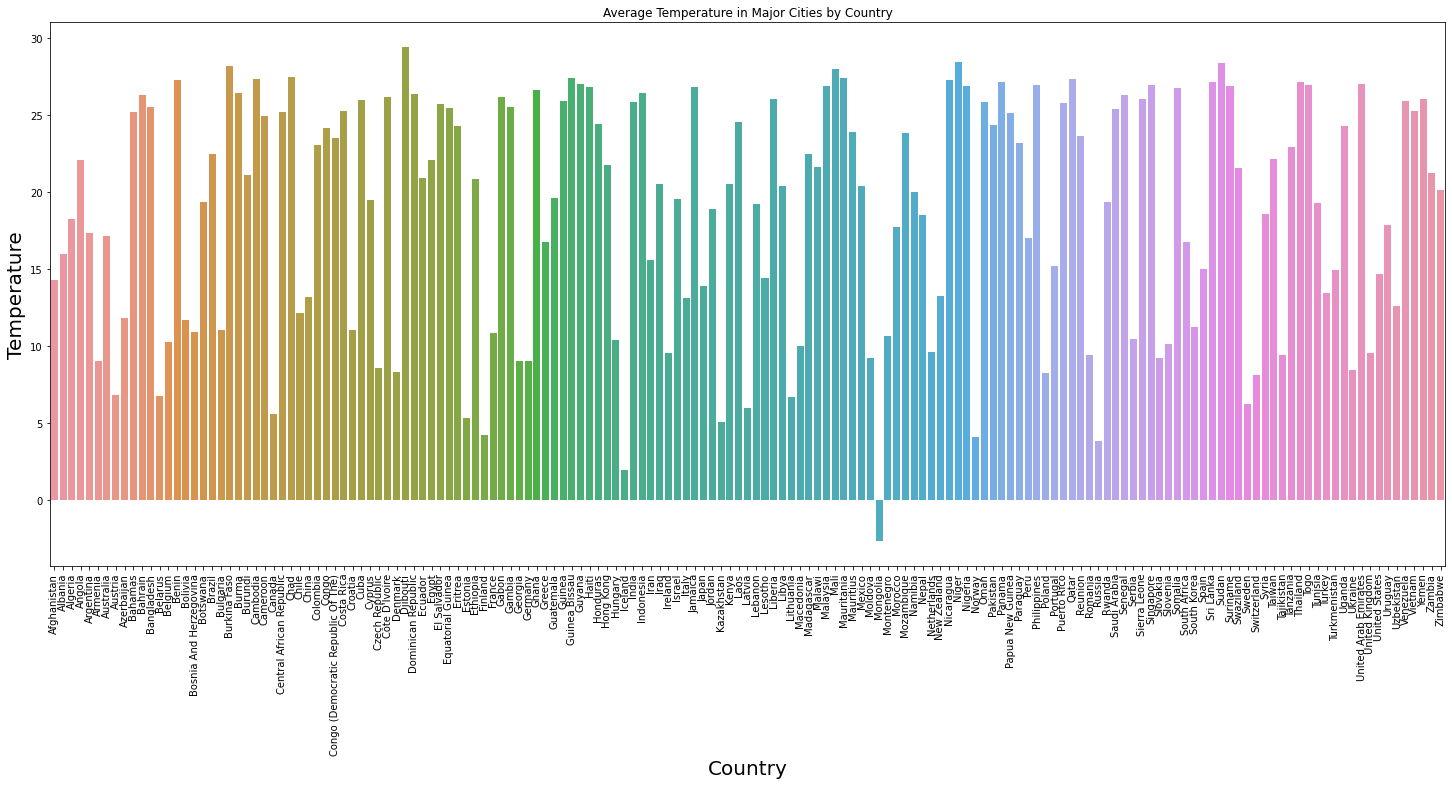

In [ ]:
plt.figure(figsize=(25,10))
avg_temp_per_country_df = combined_city_df.groupby(by = ['Country'])['AverageTemperature'].mean().reset_index()
chart = sns.barplot(x = 'Country', y = 'AverageTemperature', data = avg_temp_per_country_df)
chart.set(title='Average Temperature in Major Cities by Country')
chart.set_xlabel('Country', fontsize = 20)
chart.set_ylabel('Temperature', fontsize = 20)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
plt.show() 
chart

As we can see, our dataset has an abundence of different values for the average temperature in that country in our observed period of time (and even one negative value) and as such, we have quite a good range of different values that our later models should pick up on (rather than just getting lucky)

In [ ]:
combined_city_df = combined_city_df.dropna()
combined_city_df = combined_city_df.rename(columns = {'Value' : 'Population'})
combined_city_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87777 entries, 612 to 2698923
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             87777 non-null  datetime64[ns]
 1   AverageTemperature             87777 non-null  float64       
 2   AverageTemperatureUncertainty  87777 non-null  float64       
 3   City                           87777 non-null  object        
 4   Country                        87777 non-null  object        
 5   Latitude                       87777 non-null  float64       
 6   Longitude                      87777 non-null  float64       
 7   Year                           87777 non-null  int64         
 8   Reliability                    87777 non-null  object        
 9   Population                     87777 non-null  float64       
 10  City proper                    87777 non-null  float64       
 11  Urban agglo

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Reliability,Population,...,56,57,58,59,Cattle (cattle slaughtered),Goats (goats slaughtered),Chicken (chicken slaughtered),Turkey (turkeys slaughtered),Pigs (pigs slaughtered),Sheep (sheeps slaughtered)
612,2001-01-01,1.918,0.381,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
613,2001-02-01,0.241,0.328,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
614,2001-03-01,1.310,0.236,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
615,2001-04-01,5.890,0.158,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
616,2001-05-01,12.016,0.351,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
617,2001-06-01,13.944,0.352,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
618,2001-07-01,18.453,0.367,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
619,2001-08-01,17.396,0.287,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
620,2001-09-01,13.206,0.207,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0
621,2001-10-01,11.732,0.200,århus,Denmark,57.05,-10.33,2001,"Final figure, complete",286668.0,...,2.137182,-0.467586,-1.095681,0.566578,615500.0,0.0,140779000.0,1038000.0,21874200.0,75116.0


### 3.5.2 Plot Average Temperature in Major Cities by Year

We will attempt to visualize some trends in the data by plotting the Average Temperature by Year for major cities. We will use a scatter plot with data points sizes' proportional to the population the year of the sampling.

In [ ]:
combined_city_pops_df = final_temps_city_df.merge(final_city_population_df, on=["City", "Year", "Country"], how="left")

combined_city_df_yearly_avg_temp = combined_city_pops_df.groupby(by = ['Year', 'City'])['AverageTemperature'].mean().reset_index()
combined_city_df_yearly_avg_temp['Population'] = combined_city_df.groupby(by = ['Year', 'City'])['Population'].max().reset_index()['Population']

maxPop = combined_city_df_yearly_avg_temp['Population'].max()
# combined_city_df_yearly_avg_temp = combined_city_df_yearly_avg_temp[combined_city_df_yearly_avg_temp['Population'] != maxPop]
combined_city_df_yearly_avg_temp = combined_city_df_yearly_avg_temp.sort_values(by=['Population', 'Year'], ascending=[False, True]).dropna()

In [ ]:
temps_major_city_df["City"] = temps_city_df["City"].str.lower()

temps_major_city_df["City"] = temps_city_df["City"].str.strip()

In [ ]:
most_recent_year = combined_city_df_yearly_avg_temp['Year'].max()
earliest_year = combined_city_df_yearly_avg_temp['Year'].min()

most_recent_df = combined_city_df_yearly_avg_temp[combined_city_df_yearly_avg_temp['Year'] == most_recent_year]
earliest_df = combined_city_df_yearly_avg_temp[combined_city_df_yearly_avg_temp['Year'] == 2000]

In [ ]:
temps_major_city_df["dt"] = pd.to_datetime(temps_major_city_df["dt"], format="%Y-%m-%d")
temps_major_city_df["Year"] = temps_major_city_df["dt"].dt.year

major_city_df = combined_city_df_yearly_avg_temp.merge(temps_major_city_df[['City', 'Year']], on = ['City', 'Year'])
major_city_df = major_city_df.drop_duplicates()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Average Temperatures By Year in Major Cities since 2000')

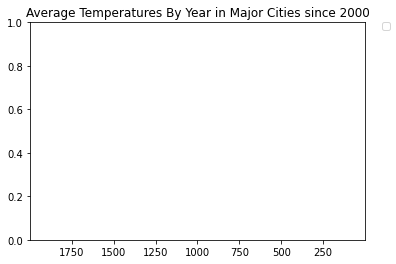

In [ ]:
sns.scatterplot(data=major_city_df, x = 'Year', y = 'AverageTemperature', size = 'Population', hue = 'City')
plt.xlim(left = 1999)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Average Temperatures By Year in Major Cities since 2000")

**The above plot stopped showing up after we made some last minute changes when our colab notebook crashed. However, we have a screenshot of the plot from when it did work. The screenshot is attached below. Unfortunately, the title is cut off.**

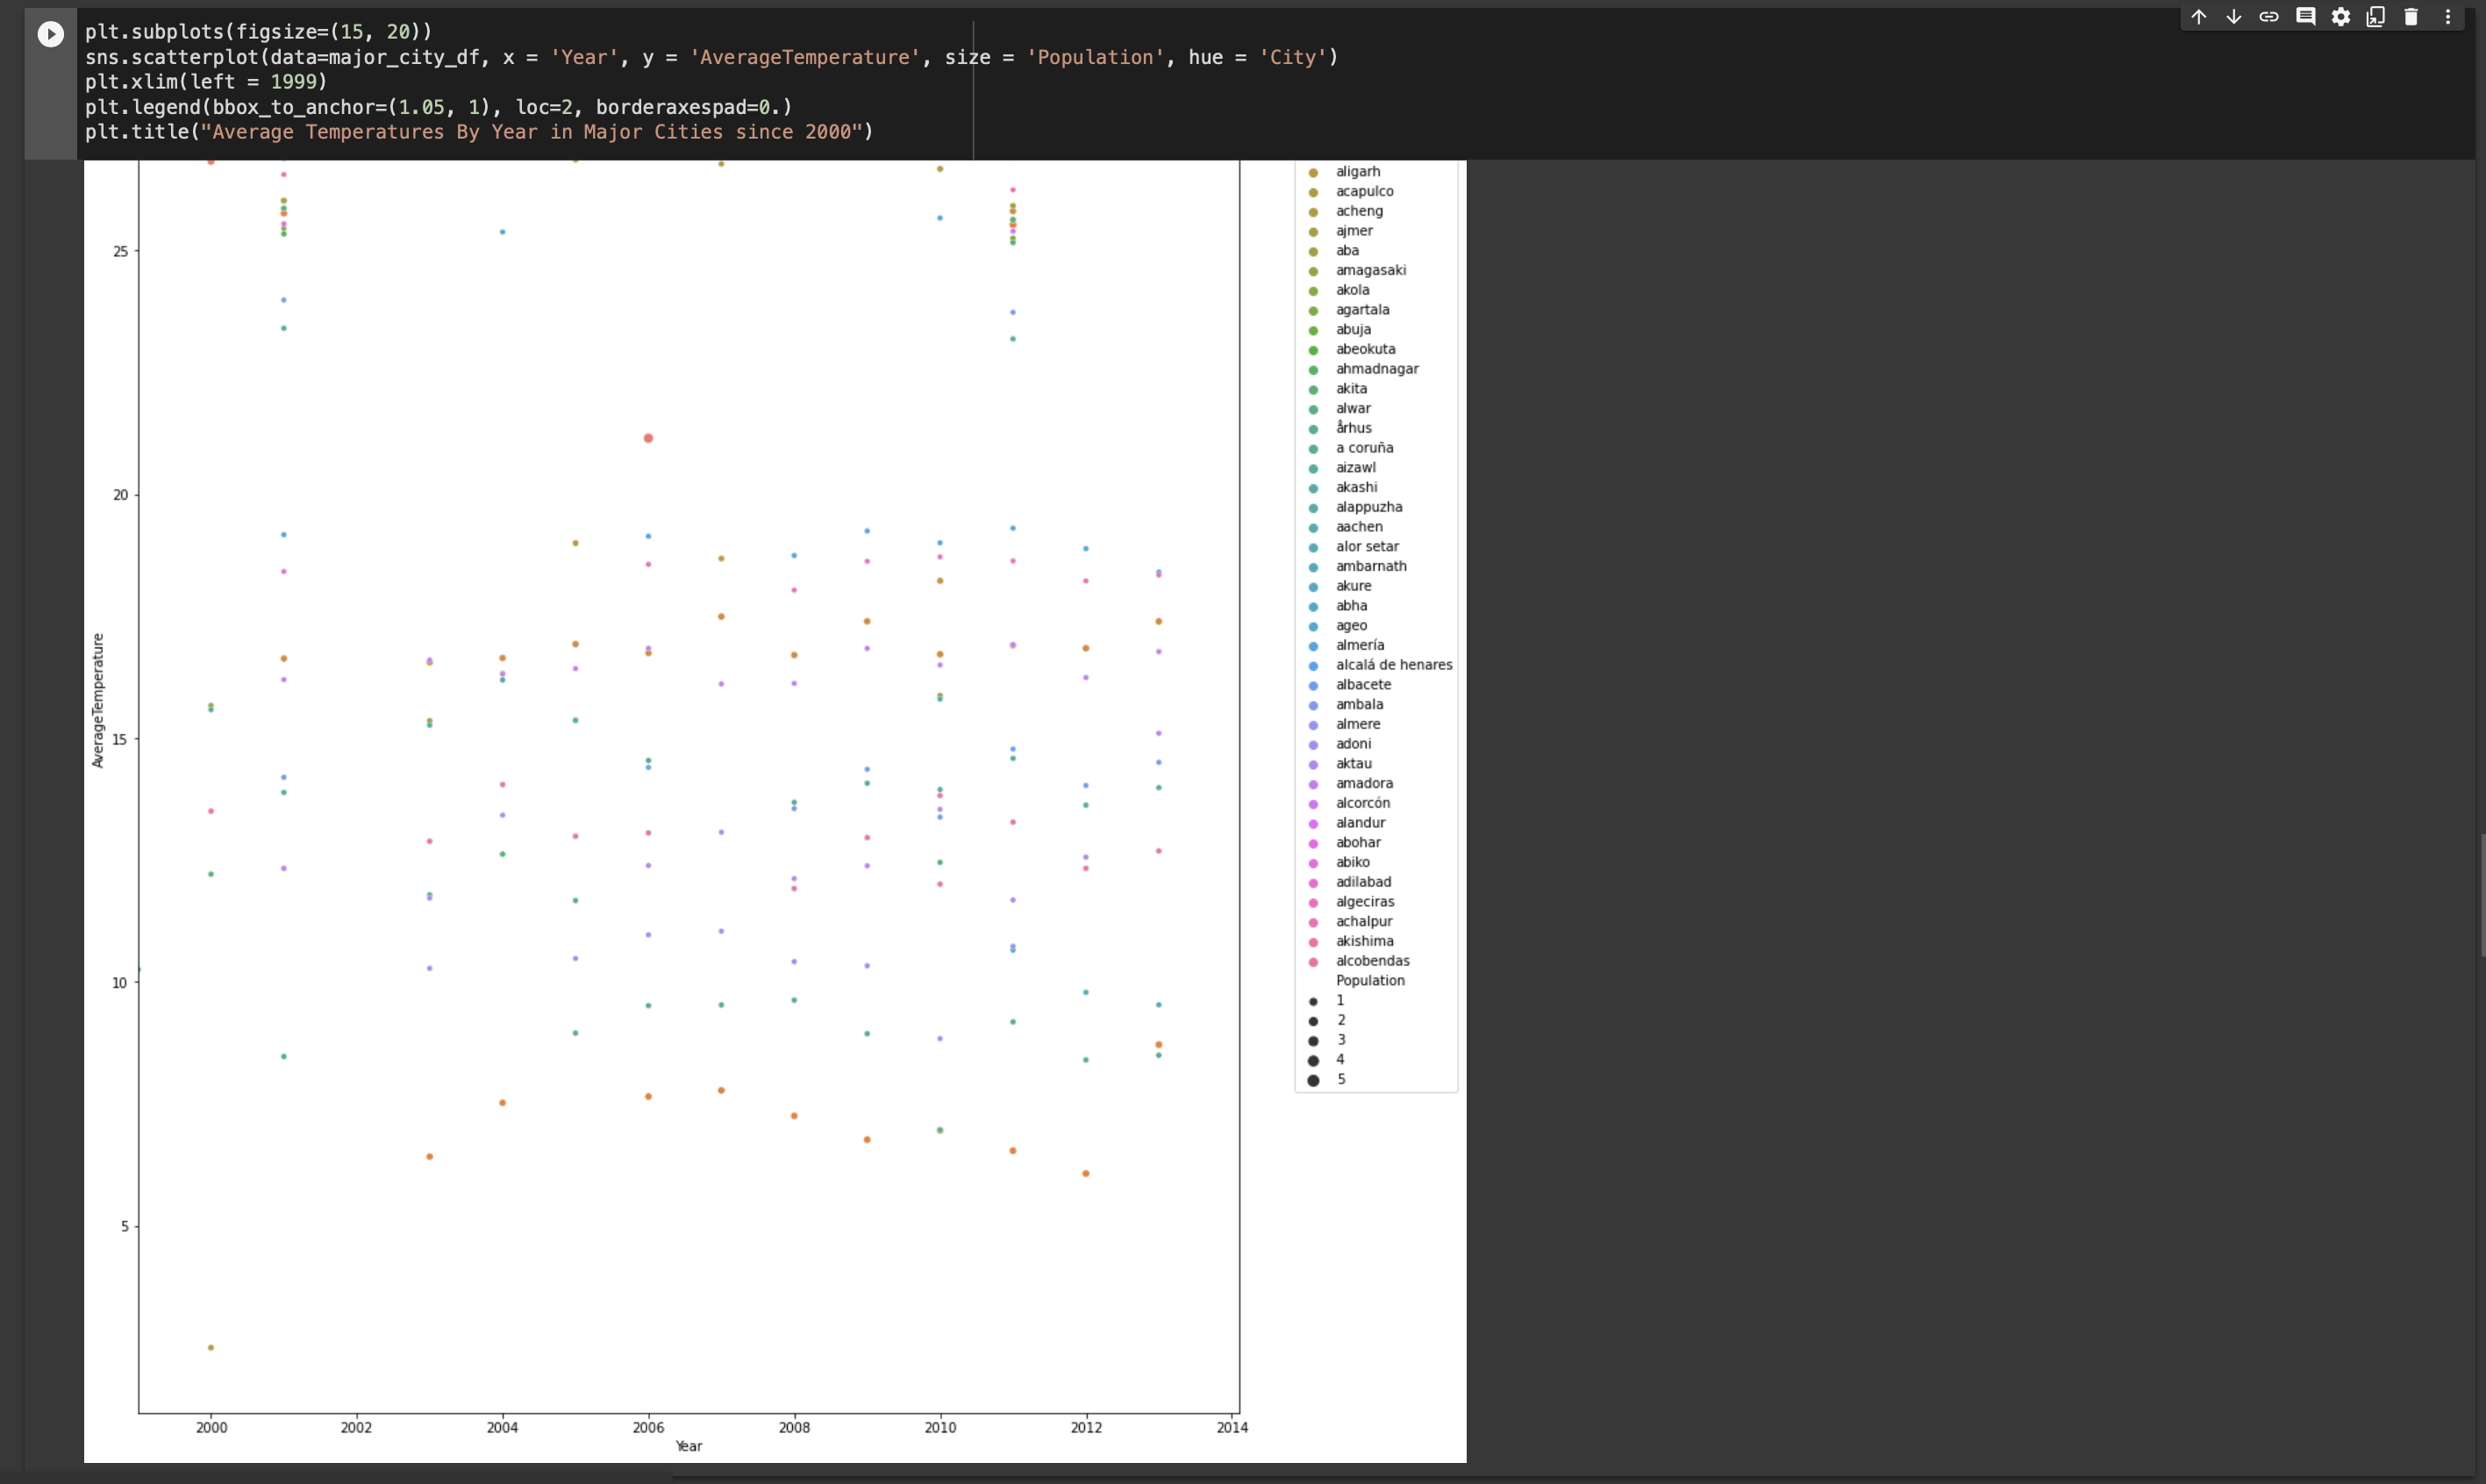

The plot above counterintuitively doesn't seem to obviously indicate any trends or relationships in the data. Perhaps a better visualization could focus on a specific location as much of the average temperature would be explained through our covariates. 

### 3.5.3 Combine the country level temperature and population datasets

In [ ]:
# Filter out extra data from population data (footnotes at the end)
temps_country_df = temps_country_df.dropna()


# Lowercase & strip whitespace in city names for both datasets
temps_country_df["Country"] = temps_country_df["Country"].str.lower()
pop_by_country_df["Country"] = pop_by_country_df["Country"].str.lower()
temps_country_df["Country"] = temps_country_df["Country"].str.strip()
pop_by_country_df["Country"] = pop_by_country_df["Country"].str.strip()

# Convert temps_city_df dt to year get the year column for merging
temps_country_df["dt"] = pd.to_datetime(temps_country_df["dt"], format="%Y-%m-%d")
temps_country_df["Year"] = temps_country_df["dt"].dt.year

# Merge on City and Year columns to produce combined df
combined_country_temps_pop_df = temps_country_df.merge(pop_by_country_df, on=["Country", "Year"], how="left")
print("Combined row count: " + str(combined_country_temps_pop_df.shape[0]))
print("Base city df row count: " + str(temps_country_df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 3230 to 8583593
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2389 non-null   datetime64[ns]
 1   AverageTemperature             2389 non-null   float64       
 2   AverageTemperatureUncertainty  2389 non-null   float64       
 3   City                           2389 non-null   object        
 4   Country                        2389 non-null   object        
 5   Latitude                       2389 non-null   object        
 6   Longitude                      2389 non-null   object        
 7   Year                           2389 non-null   int64         
 8   Sex                            2389 non-null   object        
 9   City type                      2389 non-null   object        
 10  Record Type                    2389 non-null   object        
 11  Reliability

### 3.5.4 Plot Temperature Difference Vs Population Difference from 1950 to 2010

In [ ]:
combined_country_df_yearly_avg_temp = combined_country_temps_pop_df.groupby(by = ['Year', 'Country'])['AverageTemperature'].mean().reset_index()
combined_country_df_yearly_avg_temp['Population'] = combined_country_temps_pop_df.groupby(by = ['Year', 'Country'])['Population'].max().reset_index()['Population']
combined_country_df_yearly_avg_temp = combined_country_df_yearly_avg_temp.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Sex,City type,Record Type,Reliability,Population
786674,1970-01-01,13.966,0.261,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,City proper,Sample survey - de facto,"Final figure, complete",474870.0
786675,1970-01-01,13.966,0.261,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,Urban agglomeration,Sample survey - de facto,"Final figure, complete",938940.0
786676,1970-02-01,14.236,0.239,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,City proper,Sample survey - de facto,"Final figure, complete",474870.0
786677,1970-02-01,14.236,0.239,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,Urban agglomeration,Sample survey - de facto,"Final figure, complete",938940.0
786678,1970-03-01,15.703,0.410,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,City proper,Sample survey - de facto,"Final figure, complete",474870.0
786679,1970-03-01,15.703,0.410,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,Urban agglomeration,Sample survey - de facto,"Final figure, complete",938940.0
786680,1970-04-01,18.687,0.430,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,City proper,Sample survey - de facto,"Final figure, complete",474870.0
786681,1970-04-01,18.687,0.430,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,Urban agglomeration,Sample survey - de facto,"Final figure, complete",938940.0
786682,1970-05-01,20.151,0.339,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,City proper,Sample survey - de facto,"Final figure, complete",474870.0
786683,1970-05-01,20.151,0.339,beirut,Lebanon,34.56N,35.03E,1970,Both Sexes,Urban agglomeration,Sample survey - de facto,"Final figure, complete",938940.0


In [ ]:
most_recent_year = combined_country_df_yearly_avg_temp['Year'].max()
earliest_year = combined_country_df_yearly_avg_temp['Year'].min()

most_recent_df = combined_country_df_yearly_avg_temp[combined_country_df_yearly_avg_temp['Year'] == most_recent_year]
earliest_df = combined_country_df_yearly_avg_temp[combined_country_df_yearly_avg_temp['Year'] == earliest_year]

2010    14568
2011    12072
2001     9108
2005     6864
2000     6228
2003     5100
2006     4932
2009     4860
2007     4776
2012     4656
2004     4140
2008     4140
2013     2389
1999     1788
2002     1284
1991     1272
1998      492
1996      360
1992      216
1987      120
1997      108
1993       96
1976       96
1995       84
1984       36
1970       24
1985       12
1994       12
1990       12
1988       12
1983       12
Name: Year, dtype: int64

In [ ]:
first_last_df = earliest_df.merge(most_recent_df, on = ['Country'], how = 'left')
first_last_df

In [ ]:
first_last_df['pop_diff'] = first_last_df['Population_y'] - first_last_df['Population_x']
first_last_df['temp_diff'] = first_last_df['AverageTemperature_y'] - first_last_df['AverageTemperature_x']

In [ ]:
first_last_df.sort_values(by=['pop_diff', 'temp_diff'], ascending=False)

In [ ]:
plot = sns.scatterplot(data=first_last_df, x = 'pop_diff', y = 'temp_diff', hue = 'Country', size = 'Population_y')
plot.legend_.remove()
plt.xscale('log')

# Part IV: Modeling

In the following sections, we plan to implement various regression models to predict average temperature values based on energy consumption features. We plan to use the dimensionality reduced dataset of energy consumption features along with the temperature data on a city level to train and test our models.

## 4.1 Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = combined_city_df.drop(columns = ['AverageTemperature'])
temperature = combined_city_df['AverageTemperature']

x_train, x_test, y_train, y_test = train_test_split(features, temperature, train_size=0.8,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_train, y_train)
score

In [ ]:
from sklearn.linear_model import Ridge

regularized_linear_regression_model = Ridge(alpha = 1.0).fit(x_train, y_train)
ridge_predict = regularized_linear_regression_model.predict(x_test)
ridge_score = regularized_linear_regression_model.score(x_test, y_test)
ridge_score

As we can see our linear regression and ridge regression work fairly decently with our data and they do provide a very simple model which may be of more use to someone who does not want a more computationally expensive model, especially as we can extract parameters from these models much more simply than a more complex model.

Can we do better though?

## 4.2 Neural Network

### 4.2.1 Imports and data preprocessing

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

1.11.0+cu113
cpu


In this portion, we are going to use a feed forward neural net for predicting the average temperature of a country based on features in the World Energy consumption dataset. We are going to drop any non-numeric columns, as well as the temperature uncertainty column. The label that we want to predict will be 'AverageTemperature'.

After running once, we have the data as a csv. Uncomment the next block.

In [ ]:
combined_city_energy_df = pd.read_csv('combined_city_energy.csv')

After running once, we have the data as a csv. Comment out the next block.

In [ ]:
#Merge the cleaned dataframes from earlier
combined_city_energy_df = final_temps_city_df.merge(final_world_energy_consumption_df, on=["Year", "Country"], how="left")

#drop nulls fromp merged df
combined_city_energy_df = combined_city_energy_df.dropna()
combined_city_energy_df.info()


To save RAM, we save our dataset as a CSV

In [ ]:
# combined_city_energy_df.to_csv('combined_city_energy.csv')

In [ ]:
combined_city_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752617 entries, 0 to 1752616
Data columns (total 69 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   dt                             object 
 2   AverageTemperature             float64
 3   AverageTemperatureUncertainty  float64
 4   City                           object 
 5   Country                        int64  
 6   Latitude                       float64
 7   Longitude                      float64
 8   Year                           int64  
 9   0                              float64
 10  1                              float64
 11  2                              float64
 12  3                              float64
 13  4                              float64
 14  5                              float64
 15  6                              float64
 16  7                              float64
 17  8                              float64
 18  9 

In [ ]:
features = combined_city_energy_df.drop(columns = ['AverageTemperature', 'dt', 'City'])
temperature = combined_city_energy_df['AverageTemperature']

num_feats_1 = len(features.columns)

x_train, x_test, y_train, y_test = train_test_split(features, temperature, train_size=0.8,test_size=0.2)

Below is an alternative dataset which groups the above dataframe by year and city to get the average temperature by year for each city.

In [ ]:
combined_city_df_yearly_avg_temp = combined_city_energy_df.groupby(by = ['Year', 'City']).mean().reset_index()
combined_city_df_yearly_avg_temp.head()

features = combined_city_df_yearly_avg_temp.drop(columns = ['AverageTemperature', 'City', 'Unnamed: 0'])
temperature = combined_city_df_yearly_avg_temp['AverageTemperature']

num_feats_2 = len(features.columns)

x_train2, x_test2, y_train2, y_test2 = train_test_split(features, temperature, train_size=0.8,test_size=0.2)
# combined_country_df_yearly_avg_temp['Population'] = combined_city_energy_df.groupby(by = ['Year', 'Country'])['Population'].max().reset_index()['Population']

We need to convert to the features and labels into tensor for torch. We do this by first converting the dataframes to NumPy arrays, then calling torch.from_numpy() on the NumPy array.

In [ ]:
# X_train_tens = torch.from_numpy(X_train.to_numpy())
# y_train_tens = torch.from_numpy(y_train.to_numpy())
# X_test_tens = torch.from_numpy(X_test.to_numpy())
# y_test_tens = torch.from_numpy(y_test.to_numpy())

Create the data loaders for the train and test dataset splits made above

In [ ]:
#data loader for train dataset
target = torch.tensor(y_train.values)
features = torch.tensor(x_train.values)

train = torch.utils.data.TensorDataset(features, target)
train_loader = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [ ]:
#data loader for train dataset
target = torch.tensor(y_train2.values)
features = torch.tensor(x_train2.values)

train2 = torch.utils.data.TensorDataset(features, target)
train_loader2 = torch.utils.data.DataLoader(train2, batch_size=10, shuffle=True)

In [ ]:
#data loader for test dataset
target = torch.tensor(y_test.values)
features = torch.tensor(x_test.values)

test = torch.utils.data.TensorDataset(features, target)
test_loader = torch.utils.data.DataLoader(test, batch_size=len(y_test), shuffle=True)

In [ ]:
#data loader for test dataset
target = torch.tensor(y_test2.values)
features = torch.tensor(x_test2.values)

test2 = torch.utils.data.TensorDataset(features, target)
test_loader2 = torch.utils.data.DataLoader(test2, batch_size=len(y_test2), shuffle=True)

### 4.2.2 Define the Model

The code below is where we define the architecture of our model. The user must input an argument for the number of features in the data. Additionally, they have the option to adjust the number of nodes in the hidden layers. In the future, we may add an additional argument to adjust the scalar between dimensions of the hidden layers. The architecture is for a simple feed forward neural network. It consists of:


*   A linear input layer
*   An ReLU activation layer
*  A hidden linear layer
* A second ReLU activation layer
* A linear output layer



In [ ]:
class NN(nn.Module):
    def __init__(self, num_feats, hidden = 65):
        super(NN, self).__init__()
        self.first = torch.nn.Linear(num_feats, hidden *2)  
        self.relu1 = torch.nn.ReLU()
        self.second = torch.nn.Linear(hidden * 2, hidden)
        self.relu2 = torch.nn.ReLU()
        self.out = torch.nn.Linear(hidden, 1)

    def forward(self, x):
        return self.out(self.relu2(self.second(self.relu1(self.first(x)))))

### 4.2.3 Train and Test

Because we are trainning regression models, the function that we are using for both of our models is the Mean Squared Error function. Similarly, we use the Adaptive Moment Estimation (Adam) algorithm for gradient descent in both of our models.

Below is the code for training the first, larger dataset

**TRAINING FOR TEN EPOCHS ON THE LARGER DATASET WILL TAKE ~1 hr**

In [ ]:
# Sending the data to device (CPU or GPU)
net1 = NN(num_feats_1).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(net1.parameters(), lr=1e-4) #lr - learning step

loss_LIST1 = []

# Epochs 3
for epoch in range(10):
  running_loss = 0.0
  for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = net1(inputs.float()) # Feed the network the train data
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs.float(), labels.float()) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step() # Update the weight using the gradients from back propagation by learning step

      running_loss += loss.item() #get the accumulated loss for each epoch
  loss_LIST1.append(running_loss / len(train_loader)) # get the avg loss for each epoch
  
  # print statistics
  print(f'The loss for Epoch {epoch} is: {running_loss/len(train_loader)}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


The loss for Epoch 0 is: 3572.3698679730364
The loss for Epoch 1 is: 832.7686066006162
The loss for Epoch 2 is: 373.2648882649644
The loss for Epoch 3 is: 222.4659933903666
The loss for Epoch 4 is: 167.4863794414865
The loss for Epoch 5 is: 131.00607875009533
The loss for Epoch 6 is: 98.61352655463685
The loss for Epoch 7 is: 90.5177834506382
The loss for Epoch 8 is: 89.66447730392576
The loss for Epoch 9 is: 89.33661857158717


Text(0.5, 1.0, 'Epoch vs Loss')

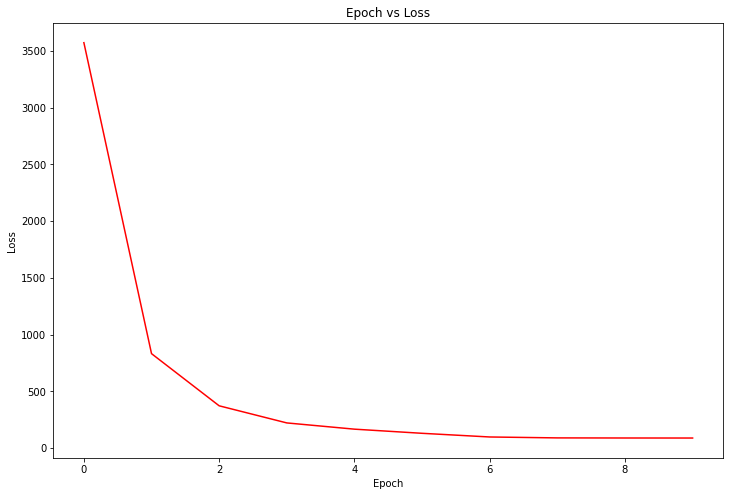

In [ ]:
fig, ax = plt.subplots(1, sharex=False, figsize=(12, 8))
ax.plot(range(10), loss_LIST1,'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Epoch vs Loss')

Below is the code for training the second dataset which contains average temoeratures over years

In [ ]:
# Sending the data to device (CPU or GPU)
net2 = NN(num_feats_2).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(net2.parameters(), lr=1e-4) #lr - learning step

loss_LIST2 = []

# Epochs 3
for epoch in range(30):
  running_loss = 0.0
  for inputs, labels in train_loader2:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = net2(inputs.float()) # Feed the network the train data
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs.float(), labels.float()) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step() # Update the weight using the gradients from back propagation by learning step

      running_loss += loss.item() #get the accumulated loss for each epoch
  loss_LIST2.append(running_loss / len(train_loader2)) # get the avg loss for each epoch
  
  # print statistics
  print(f'The loss for Epoch {epoch} is: {running_loss/len(train_loader2)}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


The loss for Epoch 0 is: 51.47577335025843
The loss for Epoch 1 is: 50.79470450826719
The loss for Epoch 2 is: 50.3157247486952
The loss for Epoch 3 is: 50.10396194040053
The loss for Epoch 4 is: 49.965255419577154
The loss for Epoch 5 is: 49.82631260551537
The loss for Epoch 6 is: 49.77327181148275
The loss for Epoch 7 is: 49.73492849644511
The loss for Epoch 8 is: 49.712014852443325
The loss for Epoch 9 is: 49.69918233286815
The loss for Epoch 10 is: 49.656118364179214
The loss for Epoch 11 is: 49.66310749699736
The loss for Epoch 12 is: 49.64700250805085
The loss for Epoch 13 is: 49.6577100016217
The loss for Epoch 14 is: 49.65631567871508
The loss for Epoch 15 is: 49.679143819590145
The loss for Epoch 16 is: 49.648022250763646
The loss for Epoch 17 is: 49.64089295211973
The loss for Epoch 18 is: 49.63278539211283
The loss for Epoch 19 is: 49.642315647636295
The loss for Epoch 20 is: 49.63906909965246
The loss for Epoch 21 is: 49.65306120608449
The loss for Epoch 22 is: 49.652690781

Text(0.5, 1.0, 'Epoch vs Loss')

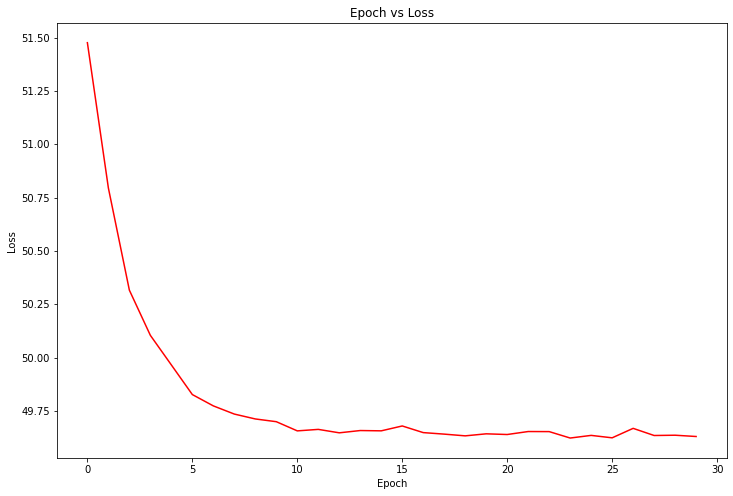

In [ ]:
fig, ax = plt.subplots(1, sharex=False, figsize=(12, 8))
ax.plot(range(30), loss_LIST2,'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Epoch vs Loss')

Below is the code for testing the first dataset

In [ ]:
total = 0
correct = 0
input_size1 = 0
preds1 = []
labs1 = []
with torch.no_grad():
    for inputs, labels in test_loader:
        input_size1 = len(inputs)
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net1(inputs.float()) 
        total += labels.size(0)
        preds1 = outputs
        labs1 = labels

NameError: ignored

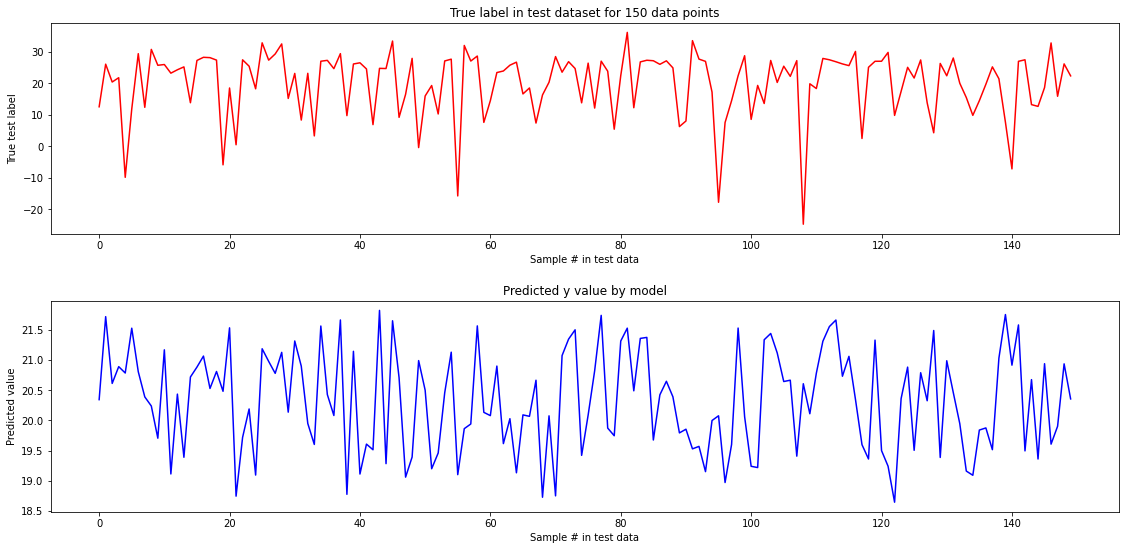

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(16, 8))
ax1.plot(range(150), labs1[:150],'r')
ax1.set_xlabel('Sample # in test data')
ax1.set_ylabel('True test label')
ax1.set_title('True label in test dataset for 150 data points')
ax2.plot(range(150), preds1[:150], 'b')
ax2.set_xlabel('Sample # in test data')
ax2.set_ylabel('Predicted value')
ax2.set_title('Predicted y value by model')
fig.tight_layout(pad=2.0)

The plot above does not do very well in predicting actual temperature values. However it does an okay job of following the trend of the actual labels, while being in a much smaller range.

Below is the code for testing the second dataset

In [ ]:
total = 0
correct = 0
input_size2 = 0
preds2 = []
labs2 = []
with torch.no_grad():
    for inputs, labels in test_loader2:
        input_size2 = len(inputs)
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net2(inputs.float()) 
        total += labels.size(0)
        preds2 = outputs
        labs2 = labels

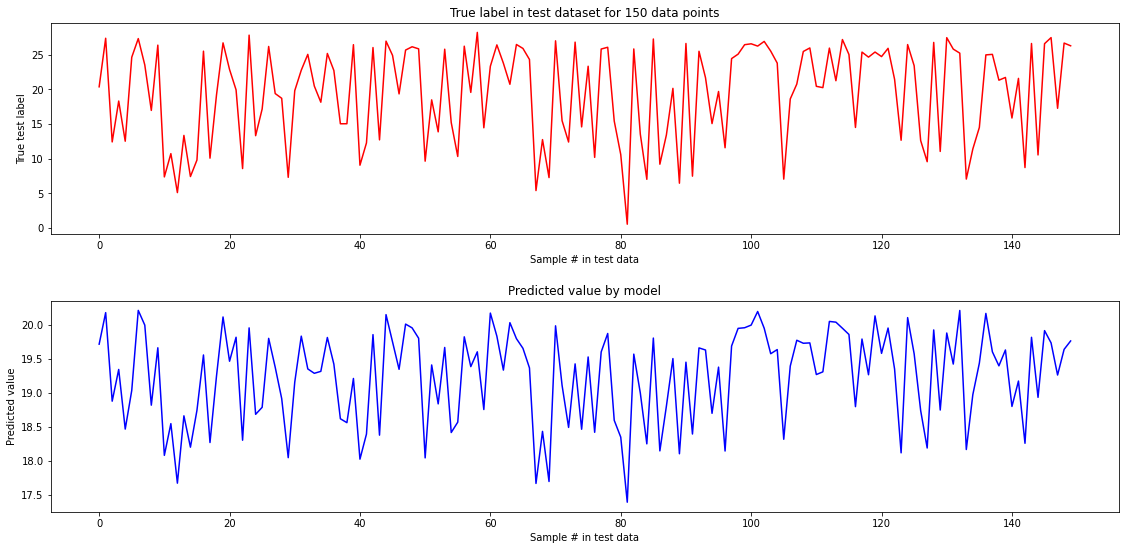

In [ ]:

fig, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(16, 8))
ax1.plot(range(150), labs2[:150],'r')
ax1.set_xlabel('Sample # in test data')
ax1.set_ylabel('True test label')
ax1.set_title('True label in test dataset for 150 data points')
ax2.plot(range(150), preds2[:150], 'b')
ax2.set_xlabel('Sample # in test data')
ax2.set_ylabel('Predicted value')
ax2.set_title('Predicted value by model')
fig.tight_layout(pad=2.0)

The above plot shows the true labels in the dataset in comparison to the ones that the model predicts. Our model is surprisingly good at picking up the general shape as well as catching both the very low dips in the test data (such as for sample #~80) the as well as the higher values which we can see around 


# Part V: Conclusions

### 5.1 Challenges and Obstacles
* The primary temperature dataset was very thorough, providing temperature reports for every day dating back to the 1700s. In contrast, all other datasets we could find that pertained to our topic did not have that same level of granularity or history.
* While multiple datasets were considered for the final feature list, technical and time restraints prevented us from utilizing all of them for the final models.
* As we were not predicting categorical features, evaluating the effectiveness of a neural network model was not as simple as calculating prediction accuracy
* There is not a good existing cloud platform (that we know of) to collaborate on python notebooks. One service, deepnote.com, facilitates simultaneous collaboration better than Google Colab; however, deepnote has less performative machines for the free service. 
* Machine limitations of deepnote forced us to write and run some later written code on Colab, where it was all lost due to the finicky version control of Colab. 


### 5.2 Potential Next Steps
* The data could be transformed to make different predictions, such as defining a classification problem for our data.
* Implementing clustering algorithms and or feature engineering to categorize data for classification.
* More relevant datasets could be integrated into the final models, providing interesting comparisons as to how these values affect the effectiveness of our models.


### 5.3 Closing Thoughts
* In conclusion, we were able to create both complex and simple models to better predict average temperature based on many different variables, including livestock data, energy use, and population data
* These models could be used to further predict changes in temperature based on these factors which would be extremely helpful in seeing how changing livestock production and energy use within these countries would help to minimize the effect of climate change
* Our project was especially rewarding as we were able to take an issue that plagues us in the modern day and that could have foreseeable effects to our way of living in the future and break it down into many of its constituent parts
* Overall, this project was a great way to apply what we learned in class into a real world dataset 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b42730b-4e51-4812-9be4-3504d1fc7377' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>